# Question 1
## Exploratory data analysis - Use the appropriate statistics and plots to investigate the following: 

1- Install requirements:
```
pip install -r requirements.txt
```
Imports:

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from pprint import   pprint
import textwrap

Throughout the question, we will follow the following steps to solve the questions:
1. Import the data (only using the required columns).
2. Printing information about the data to confirm a successful import.
3. Perform basic data cleaning.
4. Display information about the data again to ensure cleaning was successful.
5. Start exploring the data using plots
6. Further explore some data using statistical methods (optional)
7. Describe out conclusion.

We will start with question 5 as it shows all those steps in action, however, the steps wont be explicitly labeled for the rest of the questions.

### 5. The relationship between age, pre-existing medical conditions and/or risk behaviors, and rate of admittance to the ICU.

1. Import the data

In [2]:
df = pd.read_csv("../Datasets/DS-1/data.csv",
                 usecols=["age_group", "underlying_conditions_yn", "icu_yn"],
                 dtype={"age_group": "category", "underlying_conditions_yn": "category",
                        "icu_yn": "category"})

2. Print data information

In [3]:
df.info()
print("Categories for 'age_group':", df["age_group"].cat.categories)
print("Categories for 'underlying_conditions_yn':",
      df["underlying_conditions_yn"].cat.categories)
print("Categories for 'icu_yn':", df["icu_yn"].cat.categories)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020962 entries, 0 to 19020961
Data columns (total 3 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   age_group                 category
 1   icu_yn                    category
 2   underlying_conditions_yn  category
dtypes: category(3)
memory usage: 54.4 MB
Categories for 'age_group': Index(['0 - 17 years', '18 to 49 years', '50 to 64 years', '65+ years',
       'Missing'],
      dtype='object')
Categories for 'underlying_conditions_yn': Index(['No', 'Yes'], dtype='object')
Categories for 'icu_yn': Index(['Missing', 'No', 'Unknown', 'Yes'], dtype='object')


3. Clean up data

In [4]:
df = df[(df["age_group"] != "Unknown") & (
    df["age_group"] != "Missing") & (df["age_group"] != "NA")]
df = df[(df["icu_yn"] != "Missing") & (df["icu_yn"] != "Unknown")]
df = df[(df["underlying_conditions_yn"] != "Missing") & 
        (df["underlying_conditions_yn"] != "Unknown")]
df["underlying_conditions_yn"] = df["underlying_conditions_yn"].fillna("No")

df["age_group"] = df["age_group"].cat.remove_unused_categories()
df["icu_yn"] = df["icu_yn"].cat.remove_unused_categories()
df["underlying_conditions_yn"] = df["underlying_conditions_yn"].cat.remove_unused_categories()
df.reset_index(drop=True, inplace=True)

4. Print data information again.

In [6]:
display(df.head())
display(df.info())
print("Categories for 'age_group':", df["age_group"].cat.categories)
print("Categories for 'underlying_conditions_yn':",
      df["underlying_conditions_yn"].cat.categories)
print("Categories for 'icu_yn':", df["icu_yn"].cat.categories)

,age_group,icu_yn,underlying_conditions_yn
0,50 to 64 years,No,No
1,18 to 49 years,No,No
2,50 to 64 years,No,No
3,50 to 64 years,No,Yes
4,50 to 64 years,No,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606716 entries, 0 to 606715
Data columns (total 3 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   age_group                 596664 non-null  category
 1   icu_yn                    606716 non-null  category
 2   underlying_conditions_yn  606716 non-null  category
dtypes: category(3)
memory usage: 1.7 MB


None

Categories for 'age_group': Index(['0 - 17 years', '18 to 49 years', '50 to 64 years', '65+ years'], dtype='object')
Categories for 'underlying_conditions_yn': Index(['No', 'Yes'], dtype='object')
Categories for 'icu_yn': Index(['No', 'Yes'], dtype='object')


5. Start using plots to explore data.

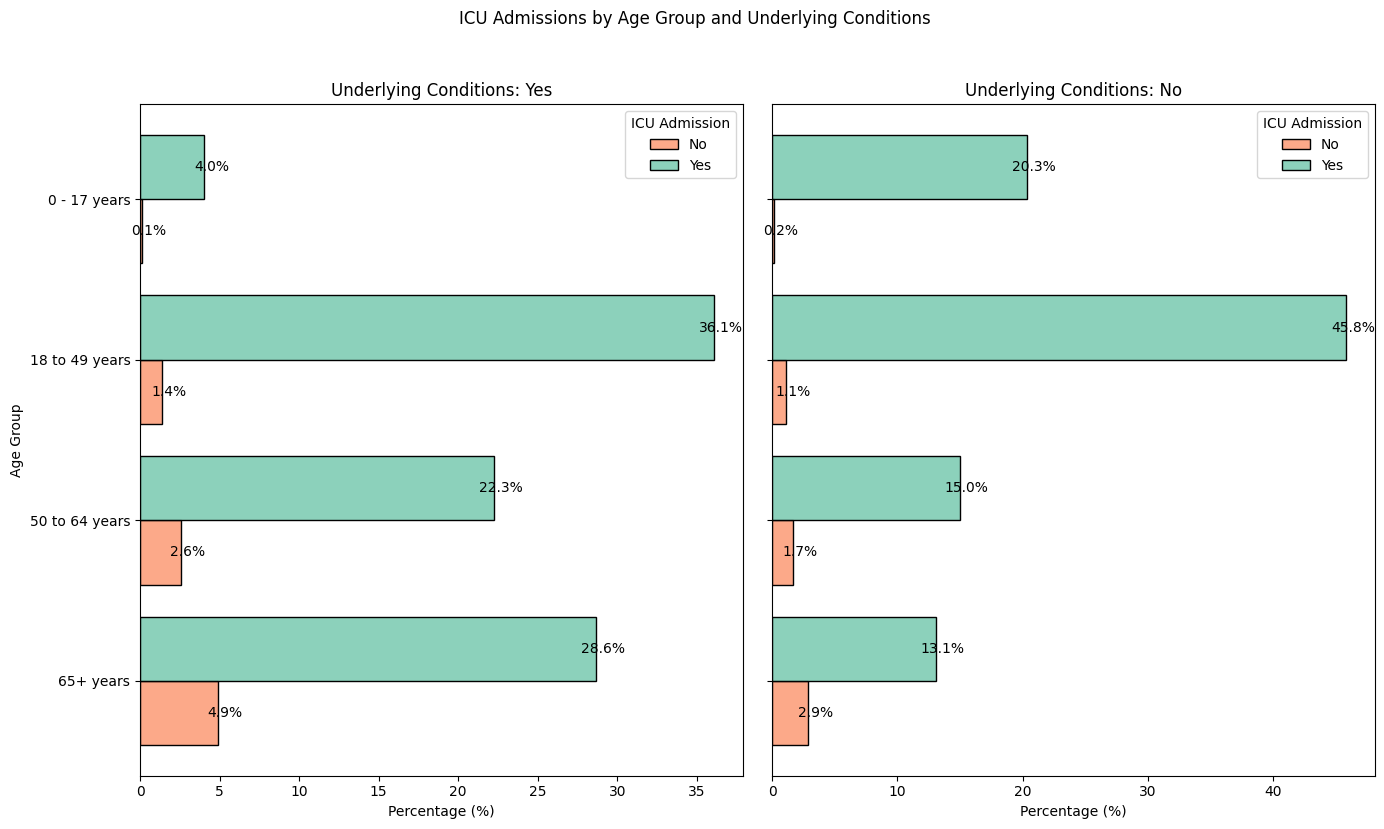

In [7]:
# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 8), sharey=True)
fig.suptitle('ICU Admissions by Age Group and Underlying Conditions', y=1.03)

# Plot for underlying conditions = Yes
plot_yes = sns.histplot(
    data=df[df['underlying_conditions_yn'] == 'Yes'],
    y='age_group',
    hue='icu_yn',
    multiple='dodge',
    shrink=0.8,
    stat='percent',
    element='bars',
    palette='Set2',
    ax=axes[0]
)
axes[0].set_title('Underlying Conditions: Yes')

# Annotate the plot with percentages
for p in plot_yes.patches:
    percentage = '{:.1f}%'.format(p.get_width())
    plot_yes.annotate(percentage,
                      (p.get_width(), p.get_y() + p.get_height() / 2.),
                      ha='center',
                      va='center',
                      xytext=(5, 0),
                      textcoords='offset points')

# Plot for underlying conditions = No
plot_no = sns.histplot(
    data=df[df['underlying_conditions_yn'] == 'No'],
    y='age_group',
    hue='icu_yn',
    multiple='dodge',
    shrink=0.8,
    stat='percent',
    element='bars',
    palette='Set2',
    ax=axes[1])
axes[1].set_title('Underlying Conditions: No')

# Annotate the plot with percentages
for p in plot_no.patches:
    percentage = '{:.1f}%'.format(p.get_width())
    plot_no.annotate(percentage,
                     (p.get_width(), p.get_y() + p.get_height() / 2.),
                     ha='center',
                     va='center',
                     xytext=(5, 0),
                     textcoords='offset points')

# Set axis labels
for ax in axes:
    ax.set_xlabel('Percentage (%)')
    ax.set_ylabel('Age Group')
    ax.legend(title='ICU Admission', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

6. Further explore the data

In [10]:
# Create the contingency table
contingency_table = pd.crosstab(
    index=[df['age_group'], df['underlying_conditions_yn']], columns=df['icu_yn'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"\nChi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("\nExpected frequencies:")
print(expected)

# Interpret the results
alpha = 0.05
if p < alpha:
    print("\nReject the null hypothesis: There is a significant association between ICU admission and the presence of \
          underlying conditions in different age groups.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between ICU admission and the presence \
          of underlying conditions in different age groups.")

Contingency Table:
icu_yn                                       No    Yes
age_group      underlying_conditions_yn               
0 - 17 years   No                         85618    670
               Yes                         7091    195
18 to 49 years No                        193049   4827
               Yes                        63179   2437
50 to 64 years No                         63081   6996
               Yes                        38987   4485
65+ years      No                         55042  12269
               Yes                        50161   8577

Chi-square statistic: 33628.01056573591
p-value: 0.0
Degrees of freedom: 7

Expected frequencies:
[[ 80437.35821836   5850.64178164]
 [  6791.98256975    494.01743025]
 [184459.28396551  13416.71603449]
 [ 61166.99537428   4449.00462572]
 [ 65325.52326938   4751.47673062]
 [ 40524.43951034   2947.56048966]
 [ 62747.06817908   4563.93182092]
 [ 54755.34891329   3982.65108671]]

Reject the null hypothesis: There is a significant

7. Our conclusion:
There is a relation seen between patients having underlying conditions and their chance of admittance to the ICU. Using the plots we can assume that underlying conditions play a factor in a patient going to the icu. 

### 1. The total number of hospitalizations versus deaths from COVID-19 over the entire US per month-year timestamp.

In [24]:
covid_data = pd.read_csv('../Datasets/DS-1/data.csv', usecols=['case_month', 'hosp_yn', 'death_yn']
                         , dtype={'hosp_yn': 'category', 'death_yn': 'category', 'case_month': 'category'})

In [25]:
display(covid_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020962 entries, 0 to 19020961
Data columns (total 3 columns):
 #   Column      Dtype   
---  ------      -----   
 0   case_month  category
 1   hosp_yn     category
 2   death_yn    category
dtypes: category(3)
memory usage: 54.4 MB


None

In [26]:

covid_data = covid_data[(covid_data["case_month"]!="Missing") & (covid_data["case_month"]!="Unknown")]
covid_data = covid_data[(covid_data['hosp_yn'] != 'Missing') & (covid_data['hosp_yn'] != 'Unknown')]
covid_data = covid_data[(covid_data['death_yn'] != 'Missing') &( covid_data['death_yn'] != 'Unknown')]
covid_data['case_month'] = covid_data['case_month'].cat.remove_unused_categories()
covid_data['hosp_yn'] = covid_data['hosp_yn'].cat.remove_unused_categories()
covid_data['death_yn'] = covid_data['death_yn'].cat.remove_unused_categories()

covid_data.reset_index(drop=True, inplace=True)
display(covid_data.info())
print("Categories for 'hosp_yn':", covid_data['hosp_yn'].cat.categories)
print("Categories for 'death_yn':", covid_data['death_yn'].cat.categories)  
print("Categories for 'case_month':", covid_data['case_month'].cat.categories)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4038132 entries, 0 to 4038131
Data columns (total 3 columns):
 #   Column      Dtype   
---  ------      -----   
 0   case_month  category
 1   hosp_yn     category
 2   death_yn    category
dtypes: category(3)
memory usage: 11.6 MB


None

Categories for 'hosp_yn': Index(['No', 'Yes'], dtype='object')
Categories for 'death_yn': Index(['No', 'Yes'], dtype='object')
Categories for 'case_month': Index(['2020-01', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07',
       '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01',
       '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07',
       '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01',
       '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07',
       '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01',
       '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07',
       '2023-08', '2023-09', '2023-10', '2023-11', '2023-12', '2024-01',
       '2024-02', '2024-03', '2020-02'],
      dtype='object')


In [28]:
# Convert 'case_month' from categorical to datetime
covid_data['case_month'] = covid_data['case_month'].astype(str)
unique_case_months = covid_data['case_month'].unique()
covid_data['case_month'] = covid_data['case_month'].str.replace('-01$', '', regex=True)
covid_data['case_month'] = pd.to_datetime(
    covid_data['case_month'], format='%Y-%m', errors='coerce')


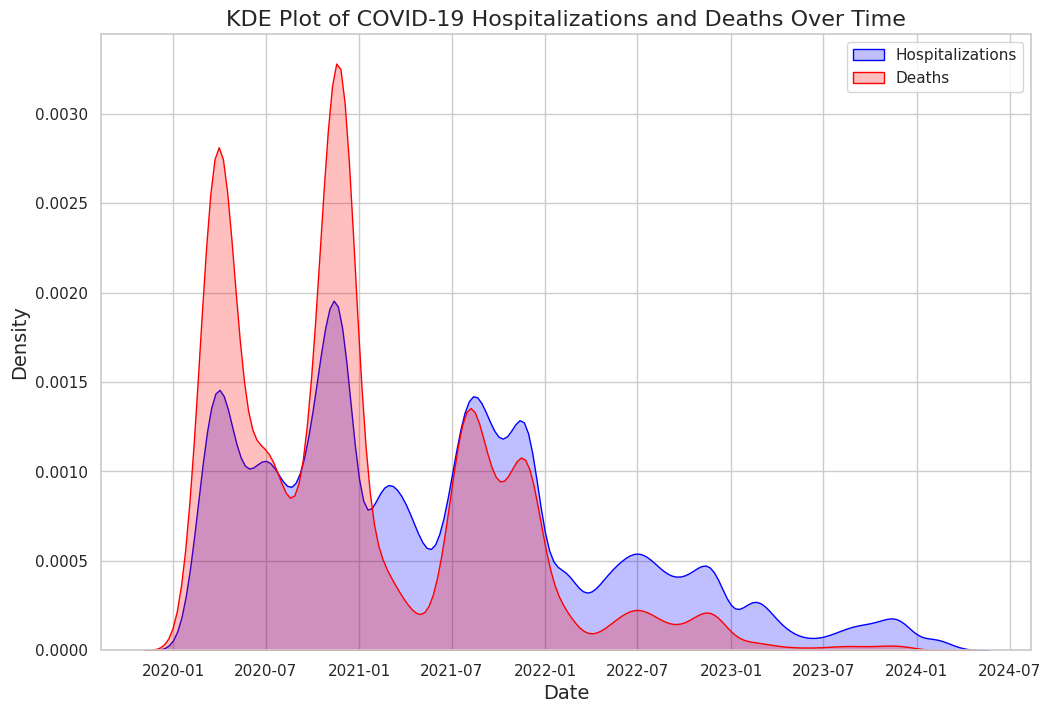

In [30]:
hospitalizations = covid_data[covid_data['hosp_yn'] == 'Yes']
deaths = covid_data[covid_data['death_yn'] == 'Yes']
fig, ax = plt.subplots(figsize=(12, 8))
sns.kdeplot(hospitalizations['case_month'], label='Hospitalizations', ax=ax, color='blue', fill=True)
sns.kdeplot(deaths['case_month'], label='Deaths', ax=ax, color='red', fill=True)
ax.set_title('KDE Plot of COVID-19 Hospitalizations and Deaths Over Time', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.legend()
plt.show()

Conclusion: We can see a peek in deaths and hospitalizations at the time COVID was starting however as vaccines and ways to deal with it came out the deaths have slowed down (shrinked vertically) compared to hospitalizations.

### 2 The relationship between age, pre-existing medical conditions and/or risk behaviors, and rate of admittance to the ICU.

In [34]:
df = pd.read_csv("../Datasets/DS-1/data.csv",
                 usecols=["age_group", "death_yn",
                          "sex", "race", "case_month"],
                 dtype={"age_group": "category", "death_yn": "category",
                        "sex": "category", "race": "category", "case_month": "category"})

In [36]:
print("Categories for 'sex':", df["sex"].cat.categories)
print("Categories for 'race':", df["race"].cat.categories)
print("Categories for 'age_group':", df["age_group"].cat.categories)
print("Categories for 'death_yn':", df["death_yn"].cat.categories)
print("Categories for 'case_month':", df["case_month"].cat.categories)

Categories for 'sex': Index(['Female', 'Male', 'Missing', 'Unknown', 'Other'], dtype='object')
Categories for 'race': Index(['American Indian/Alaska Native', 'Asian', 'Black', 'Missing',
       'Multiple/Other', 'Native Hawaiian/Other Pacific Islander', 'Unknown',
       'White'],
      dtype='object')
Categories for 'age_group': Index(['0 - 17 years', '18 to 49 years', '50 to 64 years', '65+ years',
       'Missing'],
      dtype='object')
Categories for 'death_yn': Index(['Missing', 'No', 'Unknown', 'Yes'], dtype='object')
Categories for 'case_month': Index(['2020-01', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07',
       '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01',
       '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07',
       '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01',
       '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07',
       '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01',
  

In [41]:
df = df[(df["death_yn"] != "Unknown") & (df["death_yn"] != "Missing")]
df = df[(df["sex"] != "Unknown") & (
    df["sex"] != "Missing") & (df["sex"] != "Other")]
df = df[(df["race"] != "Unknown") & (df["race"] != "Missing")]
df = df[(df["age_group"] != "Unknown") & (df["age_group"] != "Missing")]
df = df[(df["case_month"] != "Unknown") & (df["case_month"] != "Missing")]
df["sex"] = df["sex"].cat.remove_unused_categories()
df["race"] = df["race"].cat.remove_unused_categories()
df["age_group"] = df["age_group"].cat.remove_unused_categories()
df["death_yn"] = df["death_yn"].cat.remove_unused_categories()
df["case_month"] = df["case_month"].cat.remove_unused_categories()
df.reset_index(drop=True, inplace=True)

In [42]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5525167 entries, 0 to 5525166
Data columns (total 5 columns):
 #   Column      Dtype   
---  ------      -----   
 0   case_month  category
 1   age_group   category
 2   sex         category
 3   race        category
 4   death_yn    category
dtypes: category(5)
memory usage: 26.3 MB


None

/tmp/ipykernel_11210/196729666.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(title='Death')
/tmp/ipykernel_11210/196729666.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend(title='Death')
/tmp/ipykernel_11210/196729666.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  race_plot.set_yticklabels(labels)


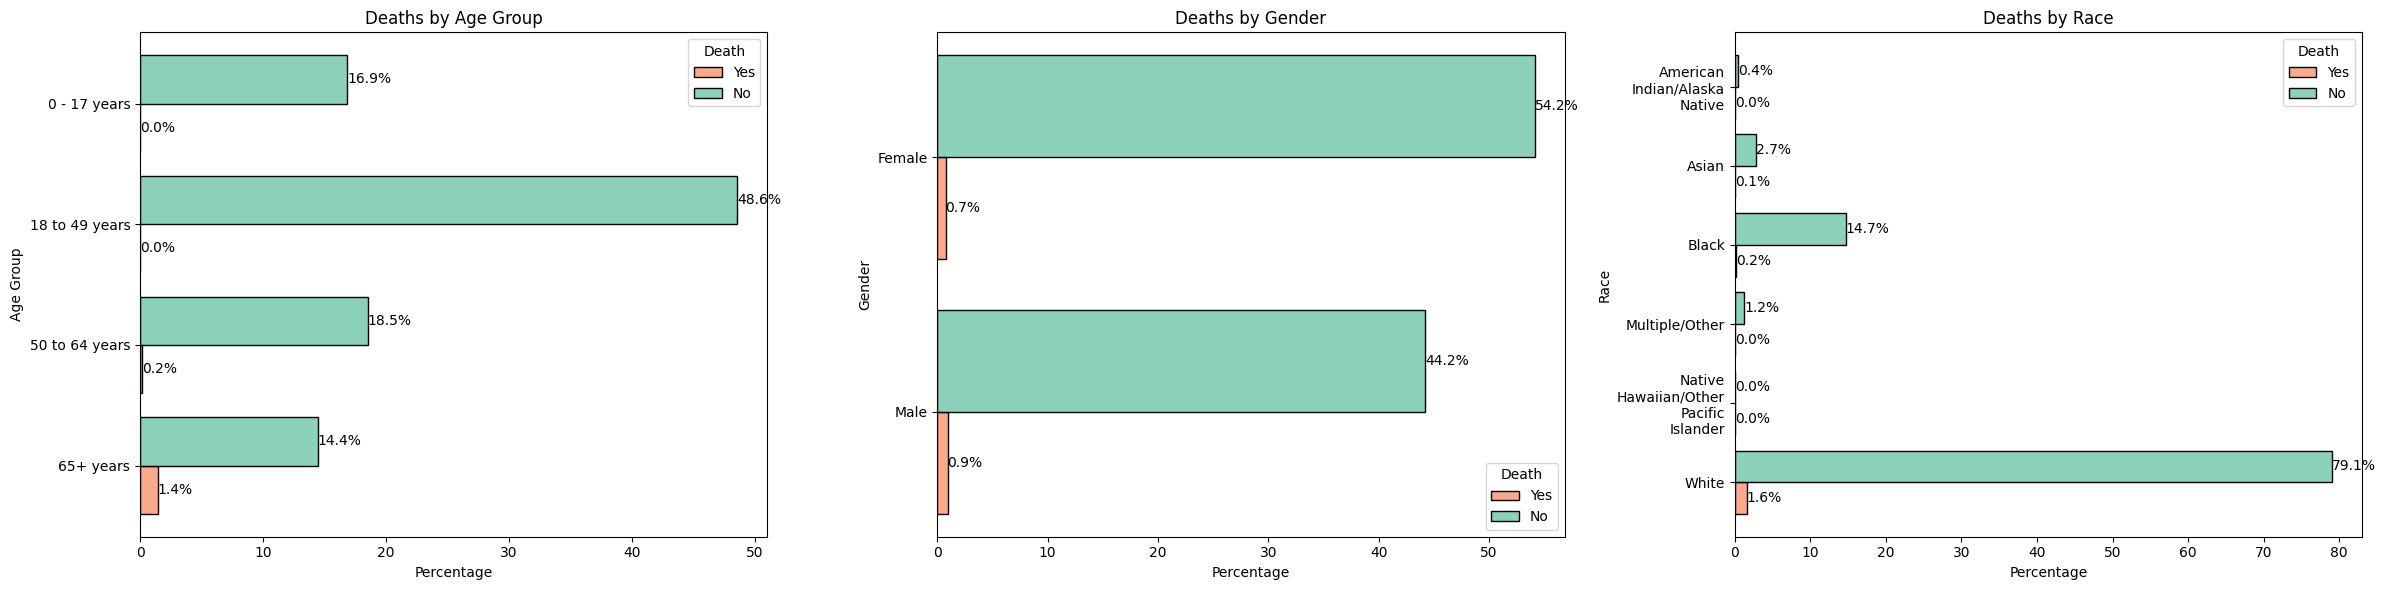

In [43]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Plot 1: Deaths by Age Group
age_group_plot = sns.histplot(data=df, y="age_group", hue="death_yn", multiple="dodge",
                              shrink=.8, stat="percent", palette="Set2", ax=axes[0], legend=False)
axes[0].set_title('Deaths by Age Group')
axes[0].set_xlabel('Percentage')
axes[0].set_ylabel('Age Group')
axes[0].legend(title='Death')
for container in age_group_plot.containers:
    labels = [f'{(v):.1f}%' for v in container.datavalues]
    age_group_plot.bar_label(container, labels=labels, label_type='edge')

# Plot 2: Deaths by Gender
gender_plot = sns.histplot(data=df, y="sex", hue="death_yn", multiple="dodge",
                           shrink=.8, stat="percent", palette="Set2", ax=axes[1], legend=False)
axes[1].set_title('Deaths by Gender')
axes[1].set_xlabel('Percentage')
axes[1].set_ylabel('Gender')
axes[1].legend(title='Death')
for container in gender_plot.containers:
    labels = [f'{(v):.1f}%' for v in container.datavalues]
    gender_plot.bar_label(container, labels=labels, label_type='edge')

# Plot 3: Deaths by Race
race_plot = sns.histplot(data=df, y="race", hue="death_yn", multiple="dodge",
                         shrink=.8, stat="percent", palette="Set2", ax=axes[2], legend=False)
axes[2].set_title('Deaths by Race')
axes[2].set_xlabel('Percentage')
axes[2].set_ylabel('Race')
labels = [textwrap.fill(label.get_text(), 15)
          for label in race_plot.get_yticklabels()]
race_plot.set_yticklabels(labels)
for container in race_plot.containers:
    labels = [f'{(v):.1f}%' for v in container.datavalues]
    race_plot.bar_label(container, labels=labels, label_type='edge')

axes[0].legend(title='Death', labels=['Yes', 'No'])
axes[1].legend(title='Death', labels=['Yes', 'No'])
axes[2].legend(title='Death', labels=['Yes', 'No'])
plt.tight_layout()
plt.show()

Conclusion: We an see that certain demographics are more at risk of death due to covid, for example people of ages 65 and older

### 3. The rates of COVID-related hospitalization and death with age (across age groups).

In [11]:
df = pd.read_csv("../Datasets/DS-1/data.csv",
                 usecols=["hosp_yn", "death_yn", "age_group", "case_month"],
                 dtype={"age_group": "category", "hosp_yn": "category", "death_yn": "category",
                        "age_group": "category", "case_month": "category", "sex": "category",
                        "race": "category"})

In [12]:
display(df.info())
print("Categories for 'hosp_yn':", df["hosp_yn"].cat.categories)
print("Categories for 'death_yn':", df["death_yn"].cat.categories)
print("Categories for 'age_group':", df["age_group"].cat.categories)
print("Categories for 'case_month':", df["case_month"].cat.categories)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020962 entries, 0 to 19020961
Data columns (total 4 columns):
 #   Column      Dtype   
---  ------      -----   
 0   case_month  category
 1   age_group   category
 2   hosp_yn     category
 3   death_yn    category
dtypes: category(4)
memory usage: 72.6 MB


None

Categories for 'hosp_yn': Index(['Missing', 'No', 'Unknown', 'Yes'], dtype='object')
Categories for 'death_yn': Index(['Missing', 'No', 'Unknown', 'Yes'], dtype='object')
Categories for 'age_group': Index(['0 - 17 years', '18 to 49 years', '50 to 64 years', '65+ years',
       'Missing'],
      dtype='object')
Categories for 'case_month': Index(['2020-01', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07',
       '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01',
       '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07',
       '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01',
       '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07',
       '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01',
       '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07',
       '2023-08', '2023-09', '2023-10', '2023-11', '2023-12', '2024-01',
       '2024-02', '2024-03', '2020-02'],
      dtype='object')


In [13]:
df = df[(df["hosp_yn"] != "Unknown") & (df["hosp_yn"] != "Missing")]
df = df[(df["death_yn"] != "Unknown") & (df["death_yn"] != "Missing")]
df = df[(df["age_group"] != "Unknown") & (df["age_group"] != "Missing")]
df = df[(df["case_month"] != "Unknown") & (df["case_month"] != "Missing")]


df["hosp_yn"] = df["hosp_yn"].cat.remove_unused_categories()
df["death_yn"] = df["death_yn"].cat.remove_unused_categories()
df["age_group"] = df["age_group"].cat.remove_unused_categories()
df["case_month"] = df["case_month"].cat.remove_unused_categories()

# Convert 'case_month' from categorical to datetime:
df['case_month'] = df['case_month'].astype(str)
unique_case_months = df['case_month'].unique()
df['case_month'] = df['case_month'].str.replace('-01$', '', regex=True)
df['case_month'] = pd.to_datetime(
    df['case_month'], format='%Y-%m', errors='coerce')

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [14]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3647563 entries, 0 to 3647562
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   case_month  datetime64[ns]
 1   age_group   category      
 2   hosp_yn     category      
 3   death_yn    category      
dtypes: category(3), datetime64[ns](1)
memory usage: 38.3 MB


None

/tmp/ipykernel_11210/1486582413.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=age_df[age_df["death_yn"] == "Yes"], x="case_month",


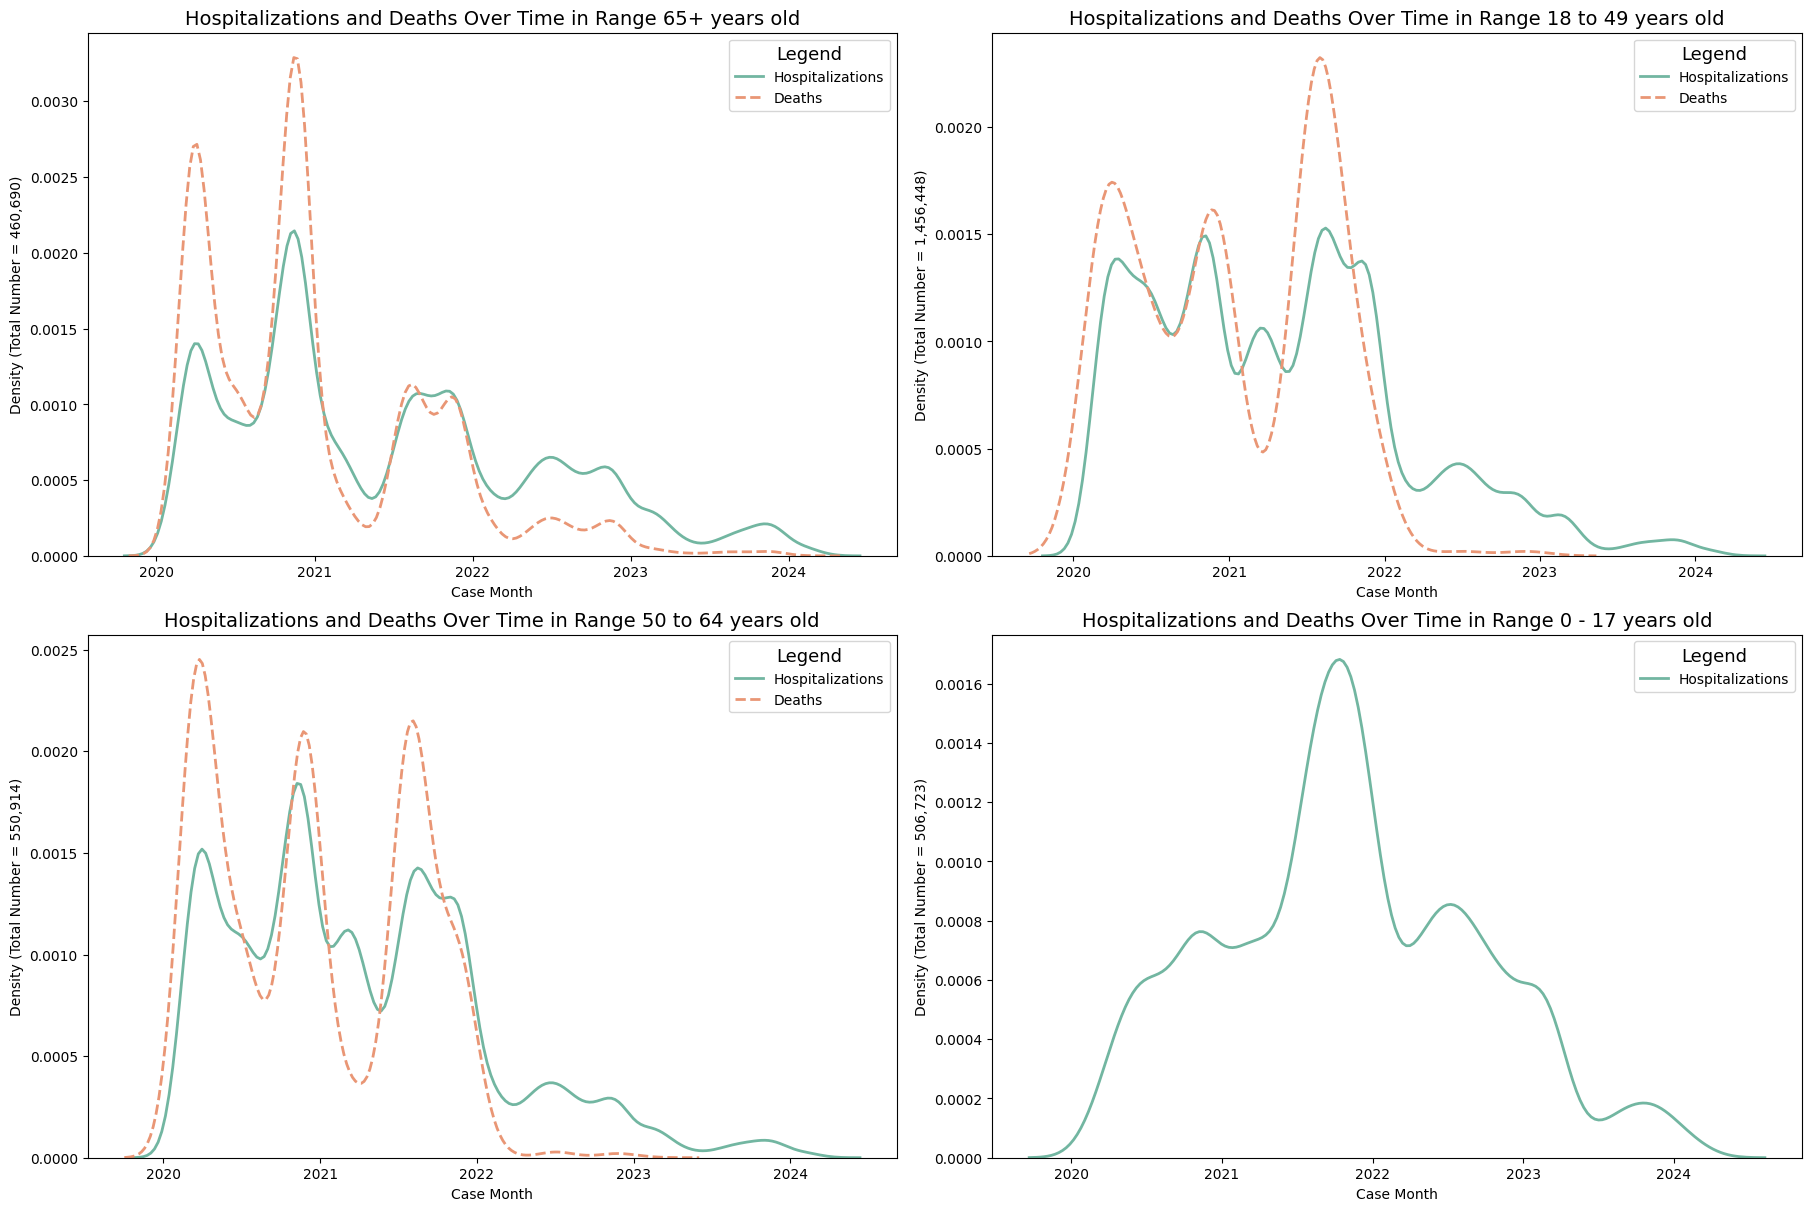

In [15]:
# List of age_groups for the example
age_groups = df['age_group'].unique()

# Number of age_groups per row
age_groups_per_row = 2
num_age_groups = len(age_groups)
num_rows = (num_age_groups + age_groups_per_row - 1) // age_groups_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, age_groups_per_row, figsize=(
    18, 6 * num_rows), constrained_layout=True)
axes = axes.flatten()

for i, age_group in enumerate(age_groups):
    age_df = df[df["age_group"] == age_group]

    sns.kdeplot(data=age_df[age_df["hosp_yn"] == "Yes"], x="case_month", ax=axes[i],
                color='#72b6a1', linestyle='-', linewidth=2, label='Hospitalizations')
    sns.kdeplot(data=age_df[age_df["death_yn"] == "Yes"], x="case_month",
                ax=axes[i], color='#e99675', linestyle='--', linewidth=2, label='Deaths')

    axes[i].set_xlabel('Case Month')
    axes[i].set_ylabel(f'Density (Total Number = {
                       df[df["age_group"] == age_group].count()["case_month"]:,})')
    axes[i].set_title(f'Hospitalizations and Deaths Over Time in Range {
                      age_group} old', fontsize=14)
    axes[i].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
    axes[i].xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
    # Add gridlines for better readability
    axes[i].grid(False)

    # Improve legend
    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(handles=handles, labels=labels,
                   title='Legend', fontsize=10, title_fontsize='13')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

Conclusion: We can assume that higher chance of death occurs as age increases, especially that no deaths have have taken place for the 17 and younger age group.

### 4. Average rate of COVID-related hospitalization and death per state over the entire study period.

In [16]:
df = pd.read_csv("../Datasets/DS-1/data.csv",
                 usecols=["hosp_yn", "death_yn", "res_state", "case_month"],
                 dtype={"age_group": "category", "hosp_yn": "category", "death_yn": "category",
                        "res_state": "category", "case_month": "category", "sex": "category",
                        "race": "category"})

In [17]:
display(df.info())
print("Categories for 'hosp_yn':", df["hosp_yn"].cat.categories)
print("Categories for 'death_yn':", df["death_yn"].cat.categories)
print("Categories for 'res_state':", df["res_state"].cat.categories)
print("Categories for 'case_month':", df["case_month"].cat.categories)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020962 entries, 0 to 19020961
Data columns (total 4 columns):
 #   Column      Dtype   
---  ------      -----   
 0   case_month  category
 1   res_state   category
 2   hosp_yn     category
 3   death_yn    category
dtypes: category(4)
memory usage: 72.6 MB


None

Categories for 'hosp_yn': Index(['Missing', 'No', 'Unknown', 'Yes'], dtype='object')
Categories for 'death_yn': Index(['Missing', 'No', 'Unknown', 'Yes'], dtype='object')
Categories for 'res_state': Index(['AZ', 'CA', 'FL', 'IL', 'MA', 'MI', 'MN', 'NC', 'NV', 'NY', 'OH', 'PA',
       'TX', 'UT', 'WA', 'NE', 'NH', 'GA', 'OR', 'LA', 'AR', 'MT', 'VA', 'VI',
       'ND', 'AL', 'HI', 'ME', 'KY', 'TN', 'WI', 'DC', 'KS', 'WY', 'OK', 'IA',
       'CO', 'RI', 'MS', 'ID', 'IN', 'SC', 'PR', 'SD', 'AK', 'CT', 'DE', 'GU',
       'MD', 'NJ', 'WV', 'MO', 'NM', 'VT'],
      dtype='object')
Categories for 'case_month': Index(['2020-01', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07',
       '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01',
       '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07',
       '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01',
       '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07',
       '2022-08', '2022-0

In [18]:
df = df[(df["hosp_yn"] != "Unknown") & (df["hosp_yn"] != "Missing")]
df = df[(df["death_yn"] != "Unknown") & (df["death_yn"] != "Missing")]
df = df[(df["res_state"] != "Unknown") & (df["res_state"] != "Missing")]
df = df[(df["case_month"] != "Unknown") & (df["case_month"] != "Missing")]
df["hosp_yn"] = df["hosp_yn"].cat.remove_unused_categories()
df["death_yn"] = df["death_yn"].cat.remove_unused_categories()
df["res_state"] = df["res_state"].cat.remove_unused_categories()
df["case_month"] = df["case_month"].cat.remove_unused_categories()

# Convert 'case_month' from categorical to datetime:
df['case_month'] = df['case_month'].astype(str)
unique_case_months = df['case_month'].unique()
df['case_month'] = df['case_month'].str.replace('-01$', '', regex=True)
df['case_month'] = pd.to_datetime(
    df['case_month'], format='%Y-%m', errors='coerce')

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [19]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017733 entries, 0 to 3017732
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   case_month  datetime64[ns]
 1   res_state   category      
 2   hosp_yn     category      
 3   death_yn    category      
dtypes: category(3), datetime64[ns](1)
memory usage: 31.7 MB


None

/tmp/ipykernel_11210/860455779.py:18: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=state_df[state_df["death_yn"] == "Yes"], x="case_month",
/tmp/ipykernel_11210/860455779.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=state_df[state_df["hosp_yn"] == "Yes"], x="case_month", ax=axes[i],
/tmp/ipykernel_11210/860455779.py:18: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=state_df[state_df["death_yn"] == "Yes"], x="case_month",
/tmp/ipykernel_11210/860455779.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend(handles=handles, labels=labels,
/tmp/ipykernel_11210/860455779.py:16: User

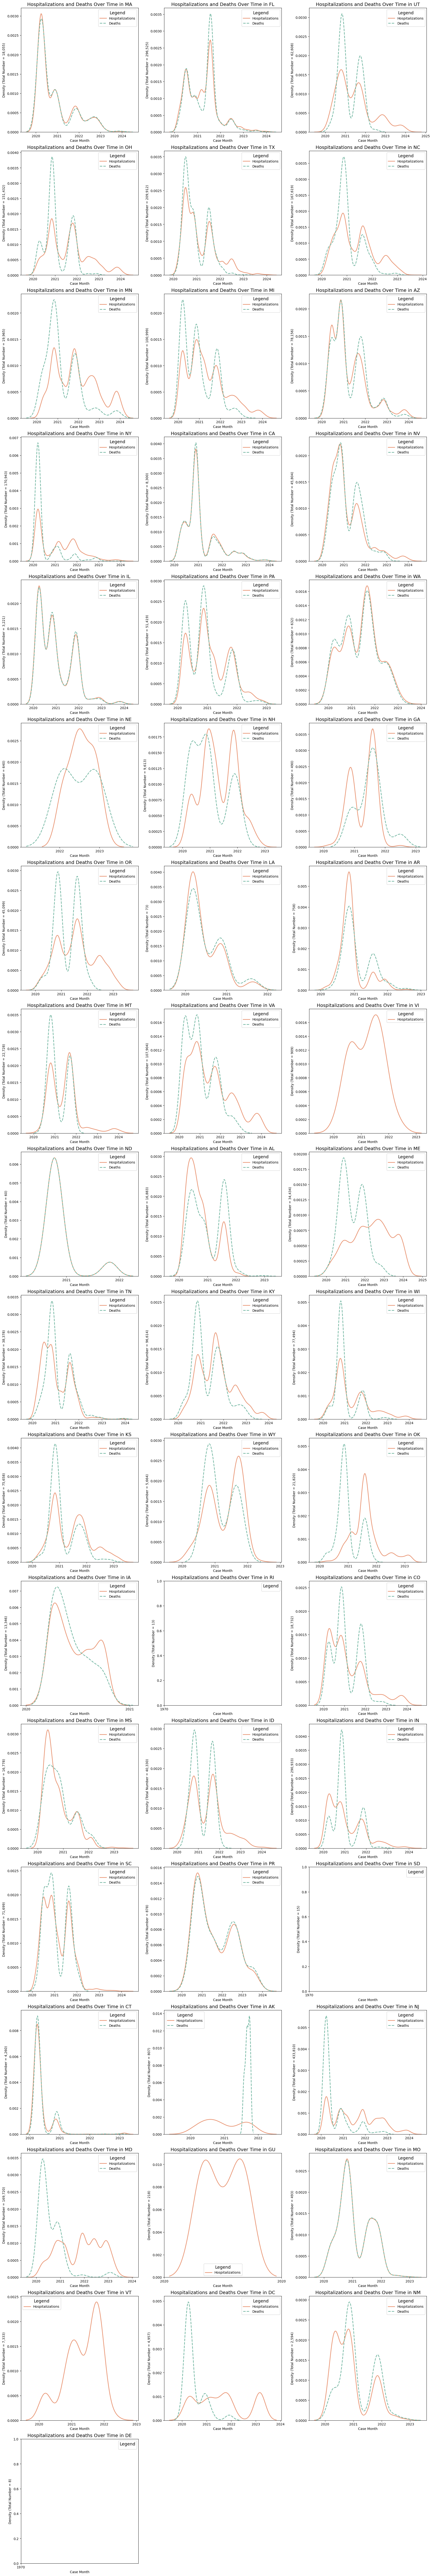

In [20]:
# List of states for the example
states = df['res_state'].unique()

# Number of states per row
states_per_row = 3
num_states = len(states)
num_rows = (num_states + states_per_row - 1) // states_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, states_per_row, figsize=(
    18, 6 * num_rows), constrained_layout=True)
axes = axes.flatten()
for i, state in enumerate(states):
    state_df = df[df["res_state"] == state]

    sns.kdeplot(data=state_df[state_df["hosp_yn"] == "Yes"], x="case_month", ax=axes[i],
                color='#e99675', linestyle='-', linewidth=2, label='Hospitalizations')
    sns.kdeplot(data=state_df[state_df["death_yn"] == "Yes"], x="case_month",
                ax=axes[i], color='#72b6a1', linestyle='--', linewidth=2, label='Deaths')

    axes[i].set_xlabel('Case Month')
    axes[i].set_ylabel(f'Density (Total Number = {
                       df[df["res_state"] == state].count()["case_month"]:,})')
    axes[i].set_title(f'Hospitalizations and Deaths Over Time in {
                      state}', fontsize=14)
    axes[i].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
    axes[i].xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
    # Add gridlines for better readability
    axes[i].grid(False)

    # Improve legend
    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(handles=handles, labels=labels,
                   title='Legend', fontsize=10, title_fontsize='13')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

Conclusion: The deaths and hospitalizations are not consistent between states. We can see completely different looking distributions as well as different means.

### 6. The rate of expected employment loss due to COVID-19 and sector of employment.

In [21]:
df = pd.read_csv("../Datasets/DS-2/data2.csv",
                 usecols=["kindwork", "expctloss"],
                 dtype={"kindwork": "category", "expctloss": "category"})

In [22]:
print(df.info())
print(df.shape)
print("Categories for 'kindwork':", df["kindwork"].cat.categories)
print("Categories for 'expctloss':", df["expctloss"].cat.categories)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088314 entries, 0 to 1088313
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype   
---  ------     --------------    -----   
 0   expctloss  1088314 non-null  category
 1   kindwork   1088314 non-null  category
dtypes: category(2)
memory usage: 2.1 MB
None
(1088314, 2)
Categories for 'kindwork': Index(['-88', '-99', '1', '2', '3', '4', '5'], dtype='object')
Categories for 'expctloss': Index(['-99', '1', '2'], dtype='object')


An extra step needs to take place when using this dataset, mapping the numerical data to it's actual definitions.

In [10]:
# Define the mapping dictionaries
mapping_dict_kindwork = {
    '1': 'Government',
    '2': 'Private company',
    '3': 'Non-profit organization including tax exempt and charitable organizations',
    '4': 'Self-employed',
    '5': 'Working in a family business',
}
yes_no = {
    '1': 'Yes',
    '2': 'No',
}

In [24]:
# Filter out missing values
df = df[(df['kindwork'] != "-99") & (df['kindwork'] != "-88")]
df = df[(df['expctloss'] != "-99") & (df['expctloss'] != "-88")]

# Remove unused categories
df['expctloss'] = df['expctloss'].cat.remove_unused_categories()
df['kindwork'] = df['kindwork'].cat.remove_unused_categories()
df.reset_index(drop=True, inplace=True)

In [25]:
# Use rename_categories to replace the codes with the names
df['kindwork'] = df['kindwork'].cat.rename_categories(mapping_dict_kindwork)
df['expctloss'] = df['expctloss'].cat.rename_categories(yes_no)
# Check the updated categories
pprint(df['kindwork'].cat.categories.to_list())
pprint(df['expctloss'].cat.categories.to_list())

['Government',
 'Private company',
 'Non-profit organization including tax exempt and charitable organizations',
 'Self-employed',
 'Working in a family business']
['Yes', 'No']


/tmp/ipykernel_11210/2549994101.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(wrapped_labels)


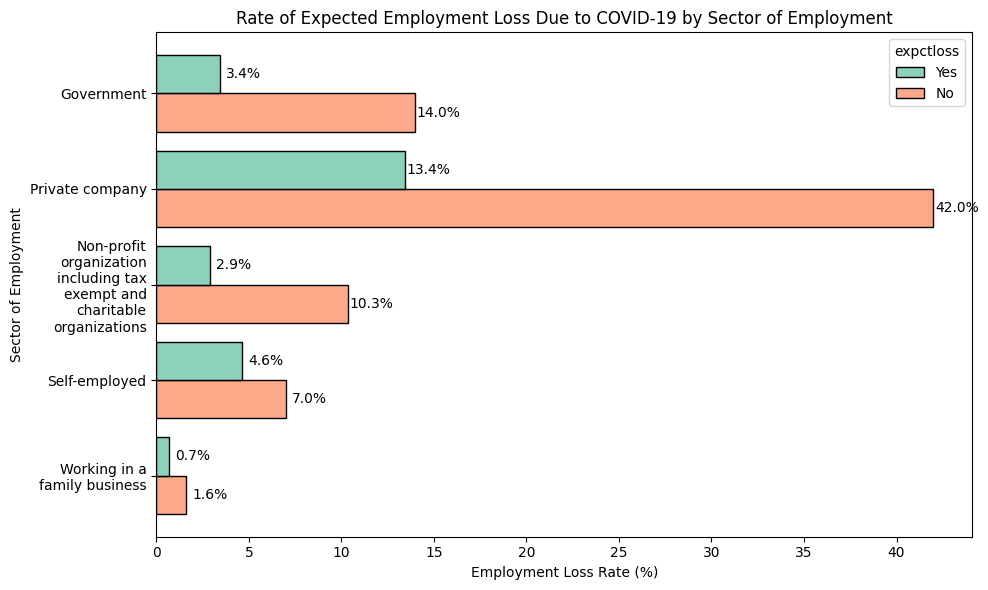

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, y='kindwork', hue='expctloss',
             multiple='dodge', shrink=.8, stat='percent', palette='Set2')

# Add percentage labels on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_width():.1f}%',
                       (p.get_width() + p.get_height()*1.5, p.get_y() + p.get_height() / 2.),
                       ha='center', va='center',
                       xytext=(9, 0), textcoords='offset points')

plt.title('Rate of Expected Employment Loss Due to COVID-19 by Sector of Employment')
plt.xlabel('Employment Loss Rate (%)')
plt.ylabel('Sector of Employment')

# Get the current y-axis labels
labels = [item.get_text() for item in plt.gca().get_yticklabels()]

# Wrap the labels
wrapped_labels = [textwrap.fill(label, 15) for label in labels]

# Set the wrapped labels
plt.gca().set_yticklabels(wrapped_labels)

plt.tight_layout()
plt.show()

Conclusion: we can see that some sectors are more afraid of their job being at risk that others.

### 7. The rate of expected employment loss due to COVID-19 relative to responders demographics (Part 1).

In [44]:
df = pd.read_csv("../Datasets/DS-2/data2.csv",
                 usecols=["egender", "rrace", "expctloss"],
                 dtype={"egender": "category", "rrace": "category", "expctloss": "category"})

In [45]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088314 entries, 0 to 1088313
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype   
---  ------     --------------    -----   
 0   egender    1088314 non-null  category
 1   rrace      1088314 non-null  category
 2   expctloss  1088314 non-null  category
dtypes: category(3)
memory usage: 3.1 MB


None

In [46]:
# Define the mapping dictionaries
mapping_dict_gender = {
    '1': 'Male',
    '2': 'Female'
}
mapping_dict_race = {
    '1': 'White, Alone',
    '2': 'Black, Alone',
    '3': 'Asian, Alone',
    '4': 'Any other race alone, or race in combination'
}

In [47]:
# Filter out unwanted categories
df = df[(df['egender'] != "-99") & (df['egender'] != "-88")]
df = df[(df['rrace'] != "-99") & (df['rrace'] != "-88")]
df = df[(df['expctloss'] != "-99") & (df['expctloss'] != "-88")]

# Remove unused categories
df['egender'] = df['egender'].cat.remove_unused_categories()
df['rrace'] = df['rrace'].cat.remove_unused_categories()
df['expctloss'] = df['expctloss'].cat.remove_unused_categories()

In [48]:
# Use rename_categories to replace the codes with the names
df['egender'] = df['egender'].cat.rename_categories(mapping_dict_gender)
df['rrace'] = df['rrace'].cat.rename_categories(mapping_dict_race)
df['expctloss'] = df['expctloss'].cat.rename_categories(yes_no)

In [49]:
display(df.info())
print("Categories for 'egender':", df["egender"].cat.categories)
print("Categories for 'rrace':", df["rrace"].cat.categories)
print("Categories for 'expctloss':", df["expctloss"].cat.categories)

<class 'pandas.core.frame.DataFrame'>
Index: 1081146 entries, 0 to 1088313
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype   
---  ------     --------------    -----   
 0   egender    1081146 non-null  category
 1   rrace      1081146 non-null  category
 2   expctloss  1081146 non-null  category
dtypes: category(3)
memory usage: 11.3 MB


None

Categories for 'egender': Index(['Male', 'Female'], dtype='object')
Categories for 'rrace': Index(['White, Alone', 'Black, Alone', 'Asian, Alone',
       'Any other race alone, or race in combination'],
      dtype='object')
Categories for 'expctloss': Index(['Yes', 'No'], dtype='object')


/tmp/ipykernel_11210/638928230.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(wrapped_labels)


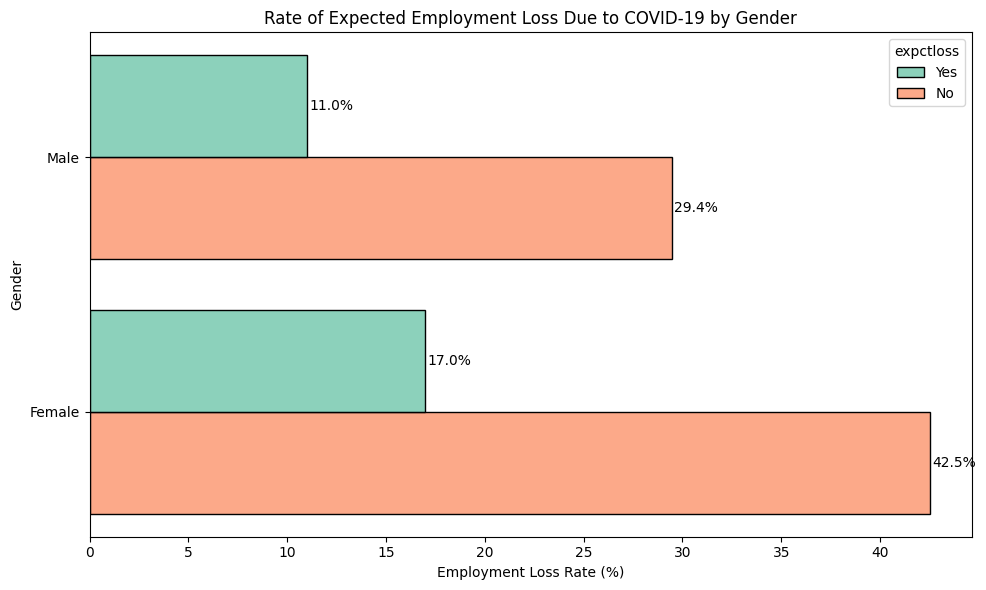

/tmp/ipykernel_11210/638928230.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(wrapped_labels)


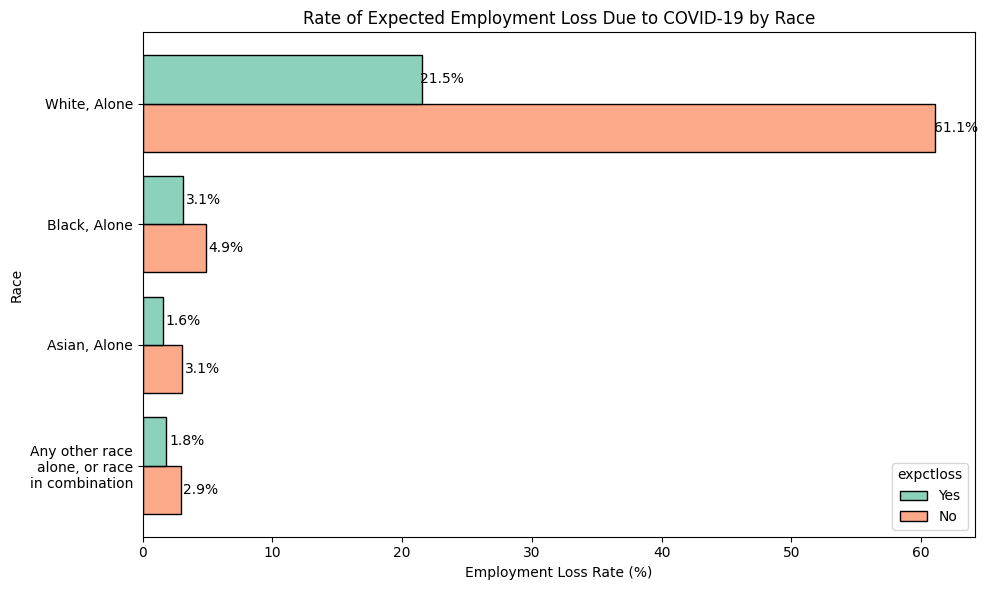

In [51]:
# Plot the category vs work loss rate as a horizontal bar chart for egender
plt.figure(figsize=(10, 6))
sns.histplot(data=df, y='egender', hue='expctloss',
             multiple='dodge', shrink=.8, stat='percent', palette='Set2')

# Add percentage labels on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_width():.1f}%',
                       (p.get_width() + p.get_height()*1.5, p.get_y() + p.get_height() / 2.),
                       ha='center', va='center',
                       xytext=(9, 0), textcoords='offset points')

plt.title('Rate of Expected Employment Loss Due to COVID-19 by Gender')
plt.xlabel('Employment Loss Rate (%)')
plt.ylabel('Gender')

# Get the current y-axis labels
labels = [item.get_text() for item in plt.gca().get_yticklabels()]

# Wrap the labels
wrapped_labels = [textwrap.fill(label, 15) for label in labels]

# Set the wrapped labels
plt.gca().set_yticklabels(wrapped_labels)

plt.tight_layout()
plt.show()

# Plot the category vs work loss rate as a horizontal bar chart for rrace
plt.figure(figsize=(10, 6))
sns.histplot(data=df, y='rrace', hue='expctloss', multiple='dodge',
             shrink=.8, stat='percent', palette='Set2')

# Add percentage labels on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_width():.1f}%',
                       (p.get_width() + p.get_height()*1.5, p.get_y() + p.get_height() / 2.),
                       ha='center', va='center',
                       xytext=(9, 0), textcoords='offset points')

plt.title('Rate of Expected Employment Loss Due to COVID-19 by Race')
plt.xlabel('Employment Loss Rate (%)')
plt.ylabel('Race')

# Get the current y-axis labels
labels = [item.get_text() for item in plt.gca().get_yticklabels()]

# Wrap the labels
wrapped_labels = [textwrap.fill(label, 15) for label in labels]

# Set the wrapped labels
plt.gca().set_yticklabels(wrapped_labels)

plt.tight_layout()
plt.show()

### 7. The rate of expected employment loss due to COVID-19 relative to responders demographics (Part 2, age only).

In [52]:
df = pd.read_csv("../Datasets/DS-2/data2.csv",
                 usecols=["tbirth_year", "expctloss"],
                 dtype={"tbirth_year": "category", "expctloss": "category"})

In [53]:
# Filter out unwanted categories
df = df[(df['tbirth_year'] != "-99") & (df['tbirth_year'] != "-88")]
df = df[(df['expctloss'] != "-99") & (df['expctloss'] != "-88")]

# Remove unused categories
df['tbirth_year'] = df['tbirth_year'].cat.remove_unused_categories()
df['expctloss'] = df['expctloss'].cat.remove_unused_categories()

# Convert tbirth_year to numeric for plotting
df['tbirth_year'] = df['tbirth_year'].astype(int)

# Use rename_categories to replace the codes with the names
df['expctloss'] = df['expctloss'].cat.rename_categories(yes_no)

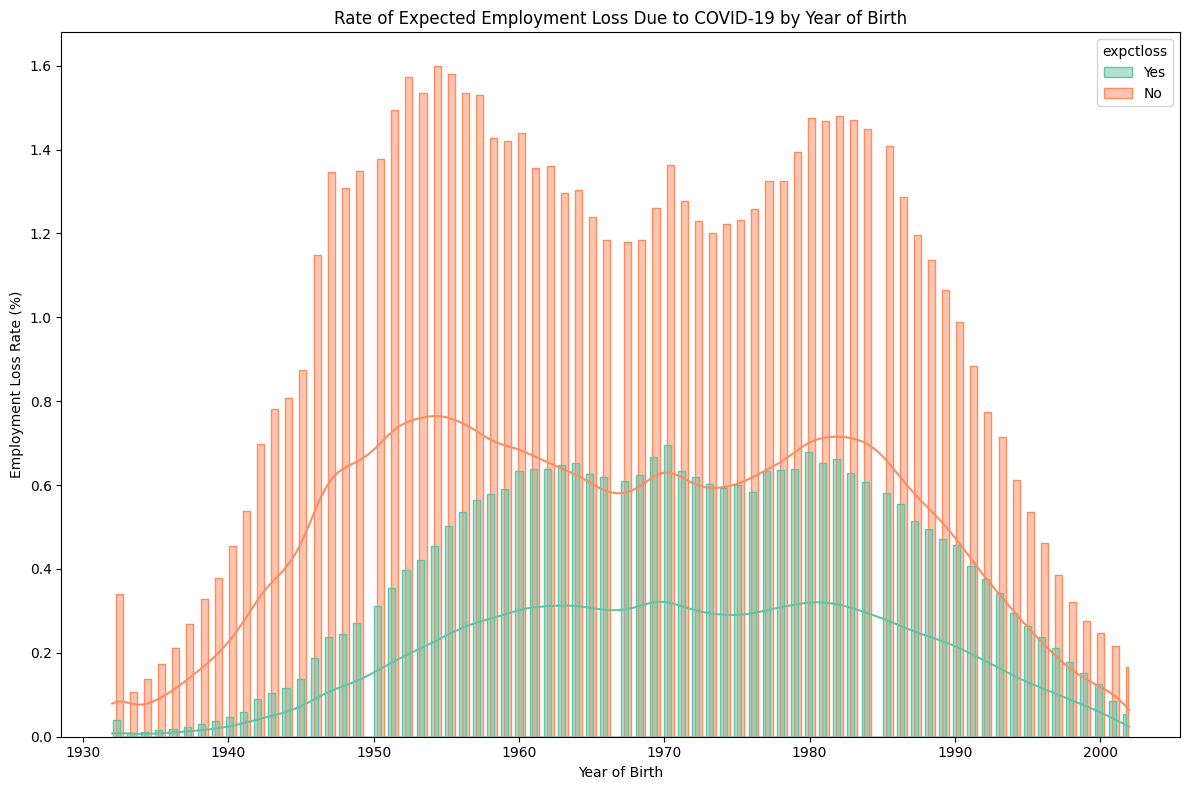

In [54]:
# Plot the category vs work loss rate as a horizontal bar chart for tbirth_year
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='tbirth_year', hue='expctloss', multiple='dodge',
             shrink=.8, stat='percent', palette='Set2', element="step", fill=True, kde=True)

plt.title('Rate of Expected Employment Loss Due to COVID-19 by Year of Birth')
plt.ylabel('Employment Loss Rate (%)')
plt.xlabel('Year of Birth')


plt.tight_layout()
plt.show()

Conclusion: We can see that certain demographics believe they are more at risk of job loss than others

### 8. The relationship between household income and the rate of delayed/ OR unobtained medical treatment (Due to COVID or otherwise)

In [3]:
df = pd.read_csv("../Datasets/DS-2/data2.csv",
                 usecols=["est_st","expctloss"],
                 dtype={"est_st": "category", "expctloss": "category"})
df_hospitalization = pd.read_csv("../Datasets/DS-1/data.csv", dtype={
                                 "res_state": "category", "hosp_yn": "category"}, usecols=["res_state", "hosp_yn"])

In [4]:
display(df.info())
display(df_hospitalization.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088314 entries, 0 to 1088313
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype   
---  ------     --------------    -----   
 0   est_st     1088314 non-null  category
 1   expctloss  1088314 non-null  category
dtypes: category(2)
memory usage: 2.1 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020962 entries, 0 to 19020961
Data columns (total 2 columns):
 #   Column     Dtype   
---  ------     -----   
 0   res_state  category
 1   hosp_yn    category
dtypes: category(2)
memory usage: 36.3 MB


None

Question specific step: Find the top 10 states at risk for hospitalization.

In [5]:
# Filter the dataframe for hospitalized cases
hospitalized_cases = df_hospitalization[df_hospitalization['hosp_yn'].str.lower(
) == 'yes']

# Handle missing values
hospitalized_cases = hospitalized_cases.dropna(subset=['res_state'])

# Get the states with the most hospitalized cases
state_hospitalization_counts = hospitalized_cases['res_state'].value_counts(
).sort_values(ascending=False)

# Display the top states
top_10_states = state_hospitalization_counts.head(10)
display(top_10_states)
top_10_states = top_10_states.index.tolist()

res_state
CA    73075
NY    57054
NJ    45461
IL    38518
TX    32327
AZ    31217
FL    30167
OH    27260
PA    21723
MN    17539
Name: count, dtype: int64

Question specific step: Map the states from the format of dataset 1 to the format of dataset 2

In [6]:
# Define the state mapping dictionary
state_map = {
    'AL': '01', 'AK': '02', 'AZ': '04', 'AR': '05', 'CA': '06', 'CO': '08', 'CT': '09', 'DE': '10',
    'DC': '11', 'FL': '12', 'GA': '13', 'HI': '15', 'ID': '16', 'IL': '17', 'IN': '18', 'IA': '19',
    'KS': '20', 'KY': '21', 'LA': '22', 'ME': '23', 'MD': '24', 'MA': '25', 'MI': '26', 'MN': '27',
    'MS': '28', 'MO': '29', 'MT': '30', 'NE': '31', 'NV': '32', 'NH': '33', 'NJ': '34', 'NM': '35',
    'NY': '36', 'NC': '37', 'ND': '38', 'OH': '39', 'OK': '40', 'OR': '41', 'PA': '42', 'RI': '44',
    'SC': '45', 'SD': '46', 'TN': '47', 'TX': '48', 'UT': '49', 'VT': '50', 'VA': '51', 'WA': '53',
    'WV': '54', 'WI': '55', 'WY': '56', 'PR': '72', 'GU': '66', 'VI': '78', 'MP': '69', 'AS': '60'
}
state_mapping_inv = {
    '01': 'Alabama', '02': 'Alaska', '04': 'Arizona', '05': 'Arkansas', '06': 'California', '08': 'Colorado',
    '09': 'Connecticut', '10': 'Delaware', '11': 'District of Columbia', '12': 'Florida', '13': 'Georgia',
    '15': 'Hawaii', '16': 'Idaho', '17': 'Illinois', '18': 'Indiana', '19': 'Iowa', '20': 'Kansas', '21': 'Kentucky',
    '22': 'Louisiana', '23': 'Maine', '24': 'Maryland', '25': 'Massachusetts', '26': 'Michigan', '27': 'Minnesota',
    '28': 'Mississippi', '29': 'Missouri', '30': 'Montana', '31': 'Nebraska', '32': 'Nevada', '33': 'New Hampshire',
    '34': 'New Jersey', '35': 'New Mexico', '36': 'New York', '37': 'North Carolina', '38': 'North Dakota',
    '39': 'Ohio', '40': 'Oklahoma', '41': 'Oregon', '42': 'Pennsylvania', '44': 'Rhode Island', '45': 'South Carolina',
    '46': 'South Dakota', '47': 'Tennessee', '48': 'Texas', '49': 'Utah', '50': 'Vermont', '51': 'Virginia',
    '53': 'Washington', '54': 'West Virginia', '55': 'Wisconsin', '56': 'Wyoming'
}

Question specific step: Get the states as their number representation in the second dataset.

In [7]:
pprint(top_10_states)
top_10_full = [state_map[state] for state in top_10_states]
pprint(top_10_full)

['CA', 'NY', 'NJ', 'IL', 'TX', 'AZ', 'FL', 'OH', 'PA', 'MN']
['06', '36', '34', '17', '48', '04', '12', '39', '42', '27']


In [11]:
df = df[df['est_st'].isin(top_10_full)]

df = df[(df['expctloss'] != "-99") & (df['expctloss'] != "-88")]

df['expctloss'] = df['expctloss'].cat.remove_unused_categories()
df['expctloss'] = df['expctloss'].cat.rename_categories(yes_no)
df['est_st'] = df['est_st'].cat.rename_categories(state_mapping_inv)
df['est_st'] = df['est_st'].cat.remove_unused_categories()
df.reset_index(drop=True, inplace=True)

/tmp/ipykernel_31318/2890388397.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(wrapped_labels)


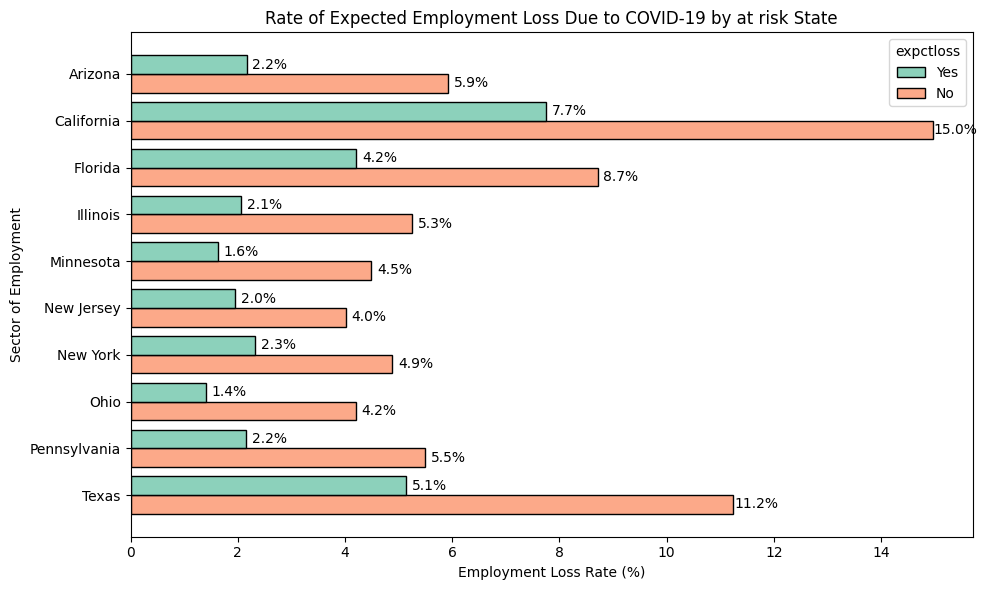

In [12]:
# Plot the category vs work loss rate as a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.histplot(data=df, y='est_st', hue='expctloss', multiple='dodge',
             shrink=.8, stat='percent', palette='Set2')

# Add percentage labels on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_width():.1f}%',
                       (p.get_width() + p.get_height()/2, p.get_y() + p.get_height() / 2.),
                       ha='center', va='center',
                       xytext=(9, 0), textcoords='offset points')

plt.title('Rate of Expected Employment Loss Due to COVID-19 by at risk State')
plt.xlabel('Employment Loss Rate (%)')
plt.ylabel('Sector of Employment')

# Get the current y-axis labels
labels = [item.get_text() for item in plt.gca().get_yticklabels()]

# Wrap the labels
wrapped_labels = [textwrap.fill(label, 15) for label in labels]

# Set the wrapped labels
plt.gca().set_yticklabels(wrapped_labels)

plt.tight_layout()
plt.show()

Conclusion: The top 10 states have high expectations of job loss.

### 9. The relationship between household income and the rate of delayed/ OR unobtained medical treatment (Due to COVID or otherwise).

In [84]:
df = pd.read_csv("../Datasets/DS-2/data2.csv",
                 usecols=["income", "delay", "notget"],
                 dtype={
                     "delay": "category",
                     "notget": "category",
                     "income": "category"
                 })

In [85]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088314 entries, 0 to 1088313
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype   
---  ------  --------------    -----   
 0   delay   1088314 non-null  category
 1   notget  1088314 non-null  category
 2   income  1088314 non-null  category
dtypes: category(3)
memory usage: 3.1 MB
None
(1088314, 3)


In [88]:
print("Categories for 'delay':", df["delay"].cat.categories)
print("Categories for 'notget':", df["notget"].cat.categories)
print("Categories for 'income':", df["income"].cat.categories)
df = df[(df["delay"] != "-99") & (df["delay"] != "-88")]
df = df[(df["notget"] != "-99") & (df["notget"] != "-88")]
df = df[(df["income"] != "-99") & (df["income"] != "-88")]
df["delay"] = df["delay"].cat.remove_unused_categories()
df["notget"] = df["notget"].cat.remove_unused_categories()
df["income"] = df["income"].cat.remove_unused_categories()
df.reset_index(drop=True, inplace=True)

Categories for 'delay': Index(['1', '2'], dtype='object')
Categories for 'notget': Index(['1', '2'], dtype='object')
Categories for 'income': Index(['1', '2', '3', '4', '5', '6', '7', '8'], dtype='object')


In [89]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940744 entries, 0 to 940743
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   delay   940744 non-null  category
 1   notget  940744 non-null  category
 2   income  940744 non-null  category
dtypes: category(3)
memory usage: 2.7 MB
None
(940744, 3)


In [90]:
income_categories = {
    "1": "Less than $25,000",
    "2": "$25,000 - $34,999",
    "3": "$35,000 - $49,999",
    "4": "$50,000 - $74,999",
    "5": "$75,000 - $99,999",
    "6": "$100,000 - $149,999",
    "7": "$150,000 - $199,999",
    "8": "$200,000 and above",
    "-99": "Question seen but not selected",
    "-88": "Missing / Did not report"
}

In [91]:
df['delay'] = df['delay'].cat.rename_categories(yes_no)
df['notget'] = df['notget'].cat.rename_categories(yes_no)
df["income"] = df["income"].cat.rename_categories(income_categories)

print("Categories for 'delay':", df["delay"].cat.categories)
print("Categories for 'notget':", df["notget"].cat.categories)
print("Categories for 'income':", df["income"].cat.categories)

Categories for 'delay': Index(['Yes', 'No'], dtype='object')
Categories for 'notget': Index(['Yes', 'No'], dtype='object')
Categories for 'income': Index(['Less than $25,000', '$25,000 - $34,999', '$35,000 - $49,999',
       '$50,000 - $74,999', '$75,000 - $99,999', '$100,000 - $149,999',
       '$150,000 - $199,999', '$200,000 and above'],
      dtype='object')


Question specific step: creating a column that is an or between "delayed" and "delayed due to covid"

In [92]:
df['delay_or_notget'] = ((df['delay'] == "Yes") | (
    df['notget'] == "No")).map({True: 'Yes', False: 'No'})

/tmp/ipykernel_11210/1976541385.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(wrapped_labels)


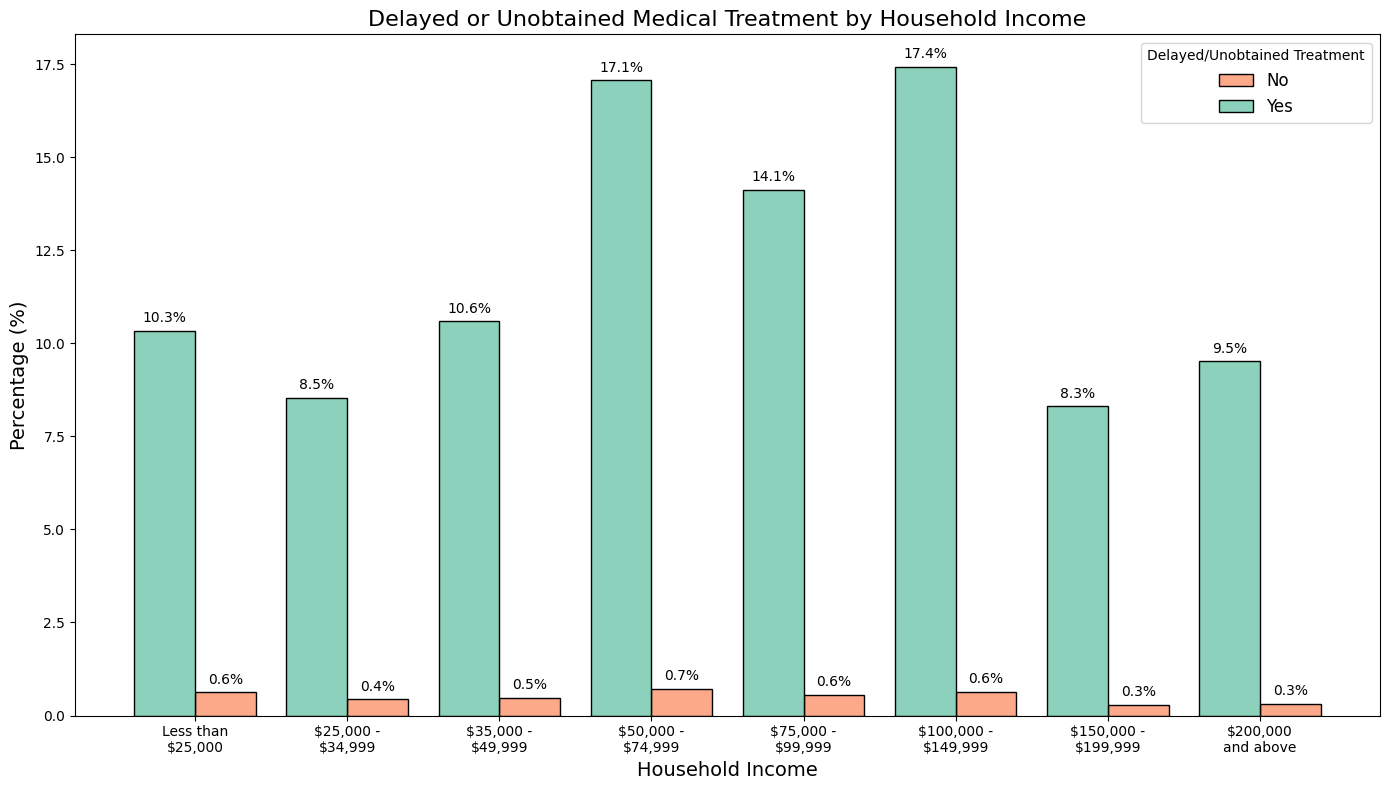

In [93]:
# Create the plot
plt.figure(figsize=(14, 8))
ax = sns.histplot(
    data=df,
    x='income',
    hue='delay_or_notget',
    palette='Set2',
    multiple='dodge',
    shrink=0.8,
    stat='percent',
    element='bars'
)

# Annotate percentages on the plot
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Set the plot labels and title
plt.title('Delayed or Unobtained Medical Treatment by Household Income', fontsize=16)
plt.xlabel('Household Income', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.legend(title='Delayed/Unobtained Treatment',
           labels=['No', 'Yes'], fontsize=12)

# Wrap x labels
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
wrapped_labels = ['\n'.join(textwrap.wrap(label, 10)) for label in labels]
plt.gca().set_xticklabels(wrapped_labels)

plt.tight_layout()
plt.show()


Since it is not too obvious, we added an extra test.

In [94]:
# Create a contingency table for the chi-square test
contingencyy_table = pd.crosstab(df['income'], df['delay_or_notget'])

# Perform the chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingencyy_table)

# Print the test results
print(f'Chi-square statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of freedom: {dof}')
print('Expected frequencies:')
print(expected)

# Interpretation of the results
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship between \
          household income and the rate of delayed or unobtained medical treatment.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between \
        household income and the rate of delayed or unobtained medical treatment.")

Chi-square statistic: 1264.6975702900409
p-value: 7.193581205977289e-269
Degrees of freedom: 7
Expected frequencies:
[[  4193.89986011  98921.10013989]
 [  3435.93527889  81043.06472111]
 [  4237.62232871  99952.37767129]
 [  6807.44600869 160566.55399131]
 [  5615.55117864 132453.44882136]
 [  6914.16950414 163083.83049586]
 [  3291.87482886  77645.12517114]
 [  3765.50101196  88816.49898804]]
Reject the null hypothesis: There is a significant relationship between household income and the rate of delayed or unobtained medical treatment.


Conclusion: We can see that the household income does effect the risk of delayed medical treatment

### 10. The relationship between COVID-19 symptom manifestation and age group.

In [95]:
df = pd.read_csv("../Datasets/DS-1/data.csv",
                 usecols=["age_group", "symptom_status"],
                 dtype={"age_group": "category", "symptom_status": "category"})

In [96]:
print(df.info())
print(df.shape)
print("Categories for 'age_group':", df["age_group"].cat.categories)
print("Categories for 'symptom_status':", df["symptom_status"].cat.categories)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020962 entries, 0 to 19020961
Data columns (total 2 columns):
 #   Column          Dtype   
---  ------          -----   
 0   age_group       category
 1   symptom_status  category
dtypes: category(2)
memory usage: 36.3 MB
None
(19020962, 2)
Categories for 'age_group': Index(['0 - 17 years', '18 to 49 years', '50 to 64 years', '65+ years',
       'Missing'],
      dtype='object')
Categories for 'symptom_status': Index(['Asymptomatic', 'Missing', 'Symptomatic', 'Unknown'], dtype='object')


In [97]:
df = df[(df["age_group"] != "Unknown") & (df["age_group"] != "Missing")]
df = df[(df["symptom_status"] != "Unknown") &
        (df["symptom_status"] != "Missing")]
df["age_group"] = df["age_group"].cat.remove_unused_categories()
df["symptom_status"] = df["symptom_status"].cat.remove_unused_categories()
df.reset_index(drop=True, inplace=True)

In [98]:
print("Categories for 'age_group':", df["age_group"].cat.categories)
print("Categories for 'symptom_status':", df["symptom_status"].cat.categories)
print(df.info())
print(df.shape)

Categories for 'age_group': Index(['0 - 17 years', '18 to 49 years', '50 to 64 years', '65+ years'], dtype='object')
Categories for 'symptom_status': Index(['Asymptomatic', 'Symptomatic'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6773424 entries, 0 to 6773423
Data columns (total 2 columns):
 #   Column          Dtype   
---  ------          -----   
 0   age_group       category
 1   symptom_status  category
dtypes: category(2)
memory usage: 12.9 MB
None
(6773424, 2)


/tmp/ipykernel_11210/3713880386.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(wrapped_labels)


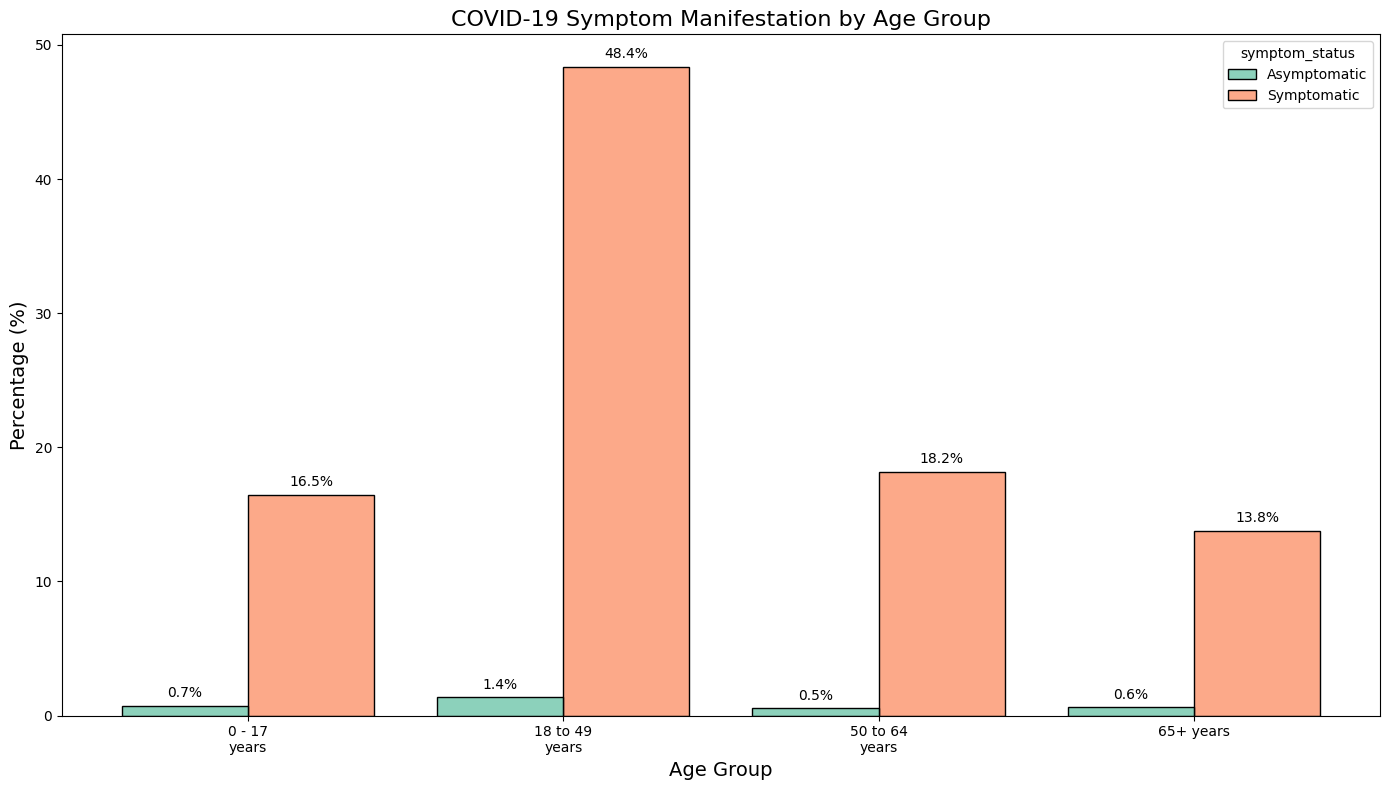

In [99]:
plt.figure(figsize=(14, 8))
ax = sns.histplot(data=df, x='age_group', hue='symptom_status',
                  palette='Set2', multiple='dodge', shrink=0.8, stat='percent')

# Calculate the percentages for annotation
total_counts = df['age_group'].value_counts().sum()
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center',
                    va='center',
                    xytext=(0, 9),
                    textcoords='offset points',
                    fontsize=10,
                    color='black')

# Set the plot labels and title
plt.title('COVID-19 Symptom Manifestation by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)

# Wrap x labels
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
wrapped_labels = ['\n'.join(textwrap.wrap(label, 10)) for label in labels]
plt.gca().set_xticklabels(wrapped_labels)

plt.tight_layout()
plt.show()

Yet again it is not immediately obvious, therefore we employed the chi squared test once again.

In [100]:
# Create a contingency table for the chi-square test
contingency_table = pd.crosstab(df['symptom_status'], df['age_group'])

# Perform the chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test results
print(f'Chi-square statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of freedom: {dof}')
print('Expected frequencies:')
print(expected)

# Interpretation of the results
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship\
        between COVID-19 symptom manifestation and age group.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship\
          between COVID-19 symptom manifestation and age group.")


Chi-square statistic: 8836.6669897201
p-value: 0.0
Degrees of freedom: 3
Expected frequencies:
[[  36882.37889398  106922.42072562   40204.45412566   30909.74625474]
 [1110697.62110602 3219924.57927438 1210740.54587434  930834.25374526]]
Reject the null hypothesis: There is a significant relationship between COVID-19 symptom manifestation and age group.


Conclusion: We can conclude that some age groups are more at risk of symptoms that others.